<a href="https://colab.research.google.com/github/redars/computer_alg/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x = 'x'
y = 'y'

In [ ]:
x

'x'

In [ ]:
def fsqrt(x):
  return ['sqrt', x]

fsqrt(x)

['sqrt', 'x']

In [ ]:
def fsin(x):
  return ['sin', x]

def fcos(x):
  return ['cos', x]

fcos(fsin(fsqrt(x)))

['cos', ['sin', ['sqrt', 'x']]]

In [ ]:
def add(x, y):
  return ['+', x, y]

def mul(x, y):
  return ['*', x, y]

z = add(x, mul(2, fsin(y)))
z

['+', 'x', ['*', 2, ['sin', 'y']]]

In [ ]:
def check(x):
  if isinstance(x, Expression):
    return x
  return Expression(x)

class Expression:
  def __init__(self, f):
    self.f = f
  def __add__(self, x):
    x = check(x)
    return Expression(add(self.f, x.f))
  def __mul__(self, x):
    x = check(x)
    return Expression(mul(self.f, x.f))
  def __radd__(self, x):
    x = check(x)
    return Expression(add(x.f, self.f))
  def __rmul__(self, x):
    x = check(x)
    return Expression(mul(x.f, self.f))
  def subs(self, var, val):
    return Expression(substitute(self.f, var, val))
  def evalf(self):
    return evaluate(self.f)
  

In [ ]:
x = Expression('x')
y = Expression('y')

print(x.f, y.f)

x y


In [ ]:
z = (x + y) * x
z.f

['*', ['+', 'x', 'y'], 'x']

In [ ]:
(x + 1).f # x.__add__(1)

['+', 'x', 1]

In [ ]:
(1 + x).f # 1.__add__(x)

['+', 1, 'x']

In [ ]:
z = x + y
print(z.f)
z *= 2 
print(z.f) 

['+', 'x', 'y']
['*', ['+', 'x', 'y'], 2]


In [ ]:
def sqrt(x):
  x = check(x)
  t = x.f
  r = fsqrt(t)
  return Expression(r)

def sin(x):
  return Expression(fsin(check(x).f))

def cos(x):
  return Expression(fcos(check(x).f))



In [ ]:
x = Expression('x')
y = Expression('y')
z = x + 2 * sin(y)
z.f

['+', 'x', ['*', 2, ['sin', 'y']]]

In [ ]:
def substitute(f, var, val):
  val = check(val).f
  if f == var:
    return val
  elif isinstance(f, list):
    y = [f[0]]
    for i in range(1, len(f)):
      t = substitute(f[i], var, val)
      y.append(t)
    return y
  else:
    return f

z = x + 2 * x
print(z.f)

t = substitute(z.f, 'x', 3)
print(t)

['+', 'x', ['*', 2, 'x']]
['+', 3, ['*', 2, 3]]


In [ ]:
z.subs('x', 3).f

['+', 3, ['*', 2, 3]]

In [ ]:
import math

def evaluate(f):
  if isinstance(f, (int, float)):
    return f
  elif isinstance(f, list):
    if f[0] == "+": 
      return evaluate(f[1]) + evaluate(f[2])
    elif f[0] == "*":
      return evaluate(f[1]) * evaluate(f[2])
    elif f[0] == "sqrt":
      return math.sqrt(evaluate(f[1]))
    elif f[0] == "sin":
      return math.sin(evaluate(f[1]))
    elif f[0] == "cos":
      return math.cos(evaluate(f[1]))
  return None
  

In [ ]:
z = sqrt(2) + sqrt(3)
print(z.f)
z.evalf()

['+', ['sqrt', 2], ['sqrt', 3]]


3.1462643699419726

In [ ]:
z = x + 1
z.subs('x', 9).evalf()

10

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot(expr, var, a, b, n):
  dx = (b - a) / n
  X, Y = [], []
  for i in range(n + 1):
    x = a + dx * i
    y = expr.subs(var, x).evalf()
    X.append(x)
    Y.append(y)

  fig, ax = plt.subplots(figsize=(12, 9))
  ax.plot(X, Y, color="red", lw=5)
  plt.show()


['*', ['sin', 'x'], 'x']


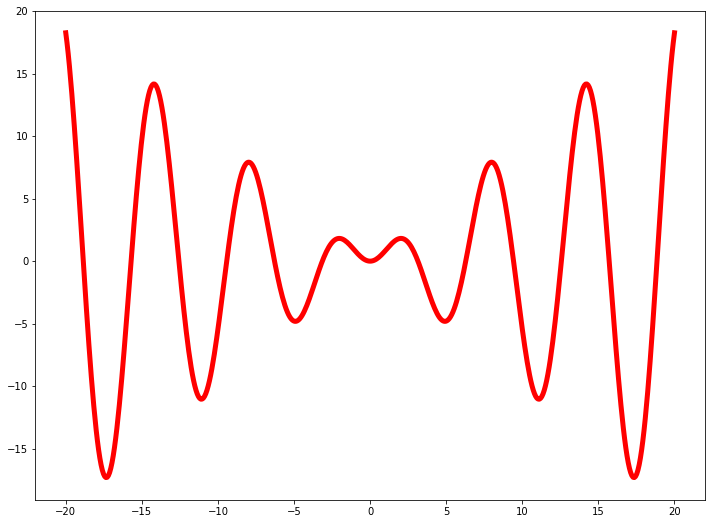

In [ ]:
y = sin(x) * x
print(y.f)
plot(y, 'x', -20, 20, 500)